In [1]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
#Load the Excel Dataset
df = pd.read_excel('CTG.xls', sheet_name = 'Data', skiprows=1)
df.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,...,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 46 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   b            2126 non-null   float64
 1   e            2126 non-null   float64
 2   AC           2126 non-null   float64
 3   FM           2127 non-null   float64
 4   UC           2127 non-null   float64
 5   DL           2128 non-null   float64
 6   DS           2128 non-null   float64
 7   DP           2128 non-null   float64
 8   DR           2128 non-null   float64
 9   Unnamed: 9   0 non-null      float64
 10  LB           2126 non-null   float64
 11  AC.1         2126 non-null   float64
 12  FM.1         2127 non-null   float64
 13  UC.1         2127 non-null   float64
 14  DL.1         2128 non-null   float64
 15  DS.1         2128 non-null   float64
 16  DP.1         2128 non-null   float64
 17  ASTV         2127 non-null   float64
 18  MSTV         2127 non-null   float64
 19  ALTV  

In [7]:
df.describe()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,...,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
count,2126.000000,2126.000000,2126.000000,2127.000000,2127.000000,2128.000000,2128.000000,2128.000000,2128.0,0.0,...,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,2127.000000,0.0,2126.000000,0.0,2126.000000
mean,878.439793,1702.877234,2.722484,7.503056,3.669017,1.576128,0.003759,0.127820,0.0,NaN,...,-0.897978,-0.531265,-0.644100,-0.848613,-0.902210,-0.721674,NaN,4.509878,NaN,1.304327
std,894.084748,930.919143,3.560850,39.030452,2.877148,2.517794,0.061213,0.471687,0.0,NaN,...,1.622232,7.250058,5.518616,2.380073,1.557258,4.328211,NaN,3.026883,NaN,0.614377
min,0.000000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,1.000000,NaN,1.000000
25%,55.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,2.000000,NaN,1.000000
50%,538.000000,1241.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.0,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,4.000000,NaN,1.000000
75%,1521.000000,2434.750000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,0.0,NaN,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN,7.000000,NaN,1.000000
max,3296.000000,3599.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,0.0,NaN,...,72.000000,332.000000,252.000000,107.000000,69.000000,197.000000,NaN,10.000000,NaN,3.000000


In [9]:
# Handle missing values
df_cleaned = df.fillna(df.mean())

# Remove unnecessary columns
df_cleaned = df_cleaned.drop(columns=['Unnamed: 9', 'Unnamed: 31', 'Unnamed: 42', 'Unnamed: 44'])

print(f"Original dataset shape: {df_cleaned.shape}")
print(f"Original columns: {list(df_cleaned.columns)}")

# Identify and drop repeating columns
redundant_columns = ['AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1']
existing_redundant = [col for col in redundant_columns if col in df_cleaned.columns]

if existing_redundant:
    print(f"Dropping redundant columns: {existing_redundant}")
    
    # Analyze the redundant columns before dropping
    print("\nAnalysis of redundant columns:")
    for col in existing_redundant:
        original_col = col.replace('.1', '')  # Get original column name
        if original_col in df_cleaned.columns:
            # Check if values are identical
            are_identical = (df_cleaned[original_col] == df_cleaned[col]).all()
            correlation = df_cleaned[original_col].corr(df_cleaned[col])
            print(f"  {original_col} vs {col}: Identical={are_identical}, Correlation={correlation:.4f}")
    
    df_cleaned = df_cleaned.drop(columns=existing_redundant)
else:
    print("No redundant columns found to drop")

# Drop the useless 'DR' column (all zero)
df_cleaned = df_cleaned.drop(columns=['DR'])

Original dataset shape: (2129, 42)
Original columns: ['b', 'e', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'DR', 'LB', 'AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP']
Dropping redundant columns: ['AC.1', 'FM.1', 'UC.1', 'DL.1', 'DS.1', 'DP.1']

Analysis of redundant columns:
  AC vs AC.1: Identical=False, Correlation=0.9145
  FM vs FM.1: Identical=False, Correlation=0.9358
  UC vs UC.1: Identical=False, Correlation=0.8374
  DL vs DL.1: Identical=False, Correlation=0.9228
  DS vs DS.1: Identical=False, Correlation=0.9899
  DP vs DP.1: Identical=False, Correlation=0.9307


In [11]:
df_cleaned.head()

,b,e,AC,FM,UC,DL,DS,DP,LB,ASTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,120.0,73.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,9.0,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,132.0,17.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,133.0,16.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,134.0,16.0,...,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,6.0,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,132.0,16.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,1.0


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 35 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   b         2129 non-null   float64
 1   e         2129 non-null   float64
 2   AC        2129 non-null   float64
 3   FM        2129 non-null   float64
 4   UC        2129 non-null   float64
 5   DL        2129 non-null   float64
 6   DS        2129 non-null   float64
 7   DP        2129 non-null   float64
 8   LB        2129 non-null   float64
 9   ASTV      2129 non-null   float64
 10  MSTV      2129 non-null   float64
 11  ALTV      2129 non-null   float64
 12  MLTV      2129 non-null   float64
 13  Width     2129 non-null   float64
 14  Min       2129 non-null   float64
 15  Max       2129 non-null   float64
 16  Nmax      2129 non-null   float64
 17  Nzeros    2129 non-null   float64
 18  Mode      2129 non-null   float64
 19  Mean      2129 non-null   float64
 20  Median    2129 non-null   floa

In [15]:
df_cleaned.describe()

,b,e,AC,FM,UC,DL,DS,DP,LB,ASTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,878.439793,1702.877234,2.722484,7.503056,3.669017,1.576128,0.003759,0.127820,133.303857,47.008933,...,-0.924777,-0.885284,-0.897978,-0.531265,-0.644100,-0.848613,-0.902210,-0.721674,4.509878,1.304327
std,893.454296,930.262718,3.558339,39.012106,2.875796,2.517203,0.061199,0.471576,9.833905,17.202559,...,1.210070,1.816281,1.621470,7.246650,5.516022,2.378954,1.556526,4.326177,3.024749,0.613944
min,0.000000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,106.000000,12.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,55.000000,1009.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,126.000000,32.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,1.000000
50%,538.000000,1244.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,133.000000,49.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.000000,1.000000
75%,1518.000000,2434.000000,4.000000,2.000000,5.000000,3.000000,0.000000,0.000000,140.000000,61.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000,1.000000
max,3296.000000,3599.000000,26.000000,564.000000,23.000000,16.000000,1.000000,4.000000,160.000000,87.000000,...,53.000000,81.000000,72.000000,332.000000,252.000000,107.000000,69.000000,197.000000,10.000000,3.000000


In [17]:
# Exploratory Data Analysis (EDA)

print("\nExploratory Data Analysis")

# 1. Basic Statistics
print("\nBasic Statistics:")
print(df_cleaned.describe())


Exploratory Data Analysis

Basic Statistics:
                 b            e           AC           FM           UC  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000   
mean    878.439793  1702.877234     2.722484     7.503056     3.669017   
std     893.454296   930.262718     3.558339    39.012106     2.875796   
min       0.000000   287.000000     0.000000     0.000000     0.000000   
25%      55.000000  1009.000000     0.000000     0.000000     1.000000   
50%     538.000000  1244.000000     1.000000     0.000000     3.000000   
75%    1518.000000  2434.000000     4.000000     2.000000     5.000000   
max    3296.000000  3599.000000    26.000000   564.000000    23.000000   

                DL           DS           DP           LB         ASTV  ...  \
count  2129.000000  2129.000000  2129.000000  2129.000000  2129.000000  ...   
mean      1.576128     0.003759     0.127820   133.303857    47.008933  ...   
std       2.517203     0.061199     0.471576     9

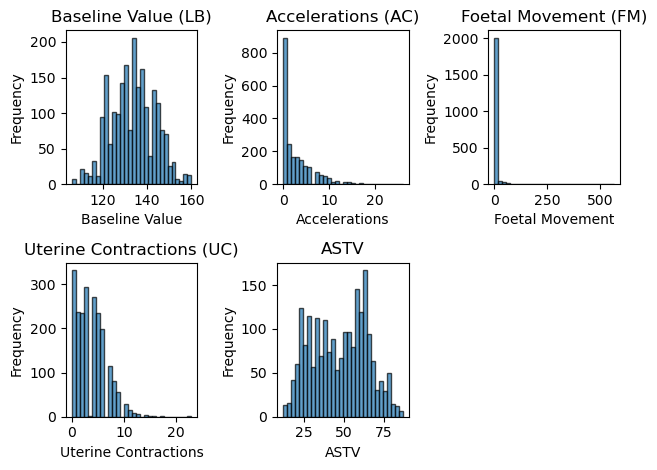

In [19]:
# Distribution of key features
plt.subplot(2, 3, 1)
plt.hist(df_cleaned['LB'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Baseline Value (LB)')
plt.xlabel('Baseline Value')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df_cleaned['AC'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Accelerations (AC)')
plt.xlabel('Accelerations')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df_cleaned['FM'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Foetal Movement (FM)')
plt.xlabel('Foetal Movement')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df_cleaned['UC'], bins=30, alpha=0.7, edgecolor='black')
plt.title('Uterine Contractions (UC)')
plt.xlabel('Uterine Contractions')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df_cleaned['ASTV'], bins=30, alpha=0.7, edgecolor='black')
plt.title('ASTV')
plt.xlabel('ASTV')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

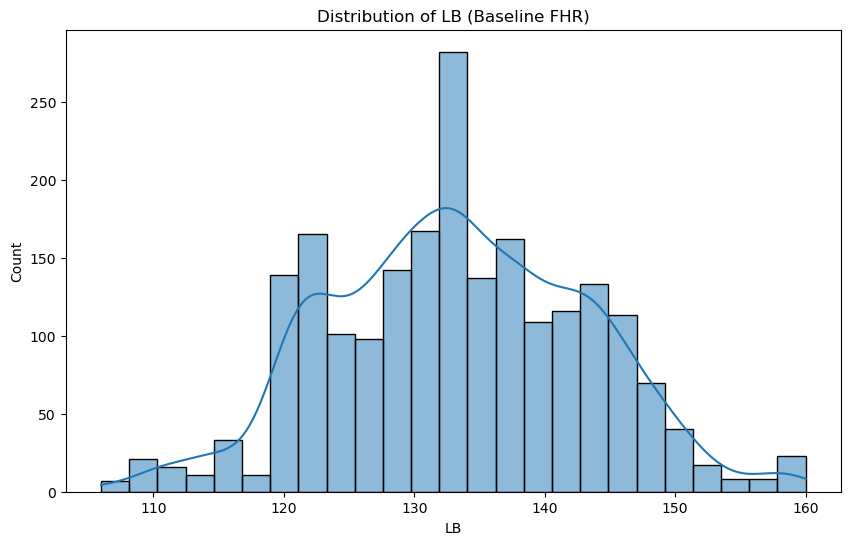

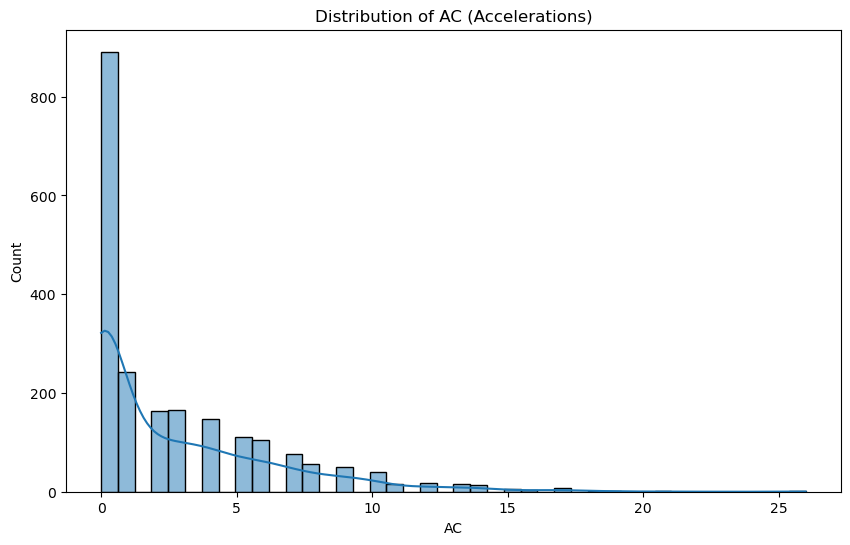

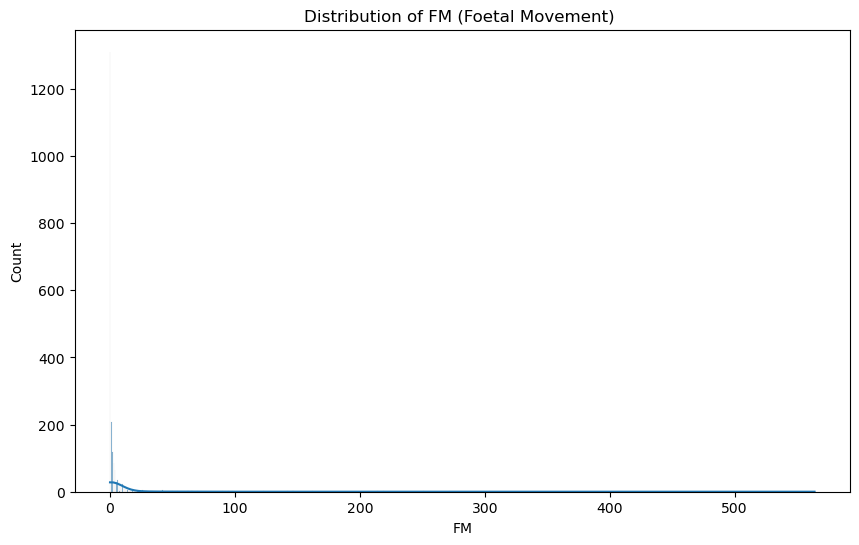

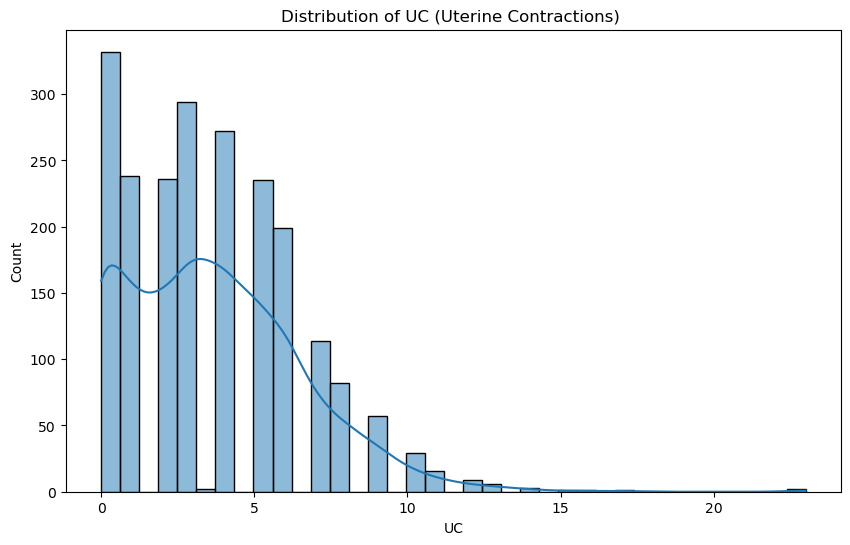

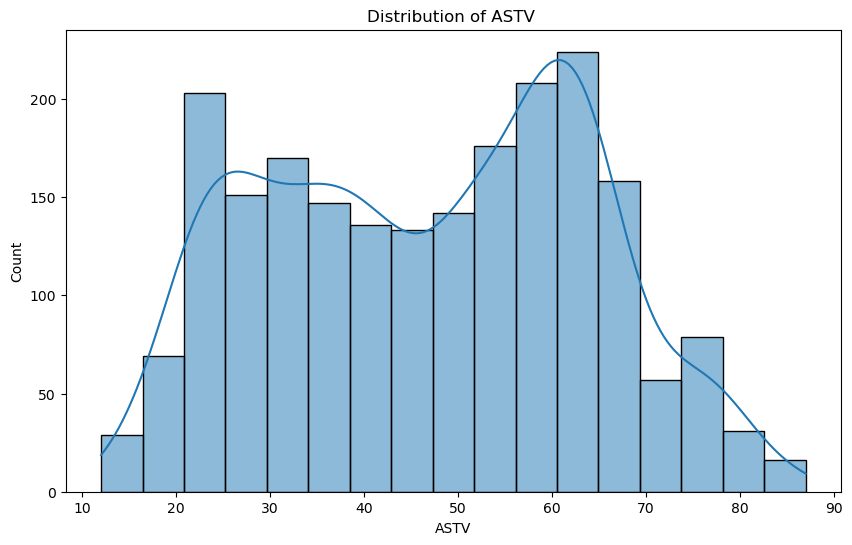

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['LB'], kde=True)
plt.title('Distribution of LB (Baseline FHR)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['AC'], kde=True)
plt.title('Distribution of AC (Accelerations)')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['FM'], kde=True)
plt.title('Distribution of FM (Foetal Movement) ')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['UC'], kde=True)
plt.title('Distribution of UC (Uterine Contractions) ')
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['ASTV'], kde=True)
plt.title('Distribution of ASTV ')
plt.show()

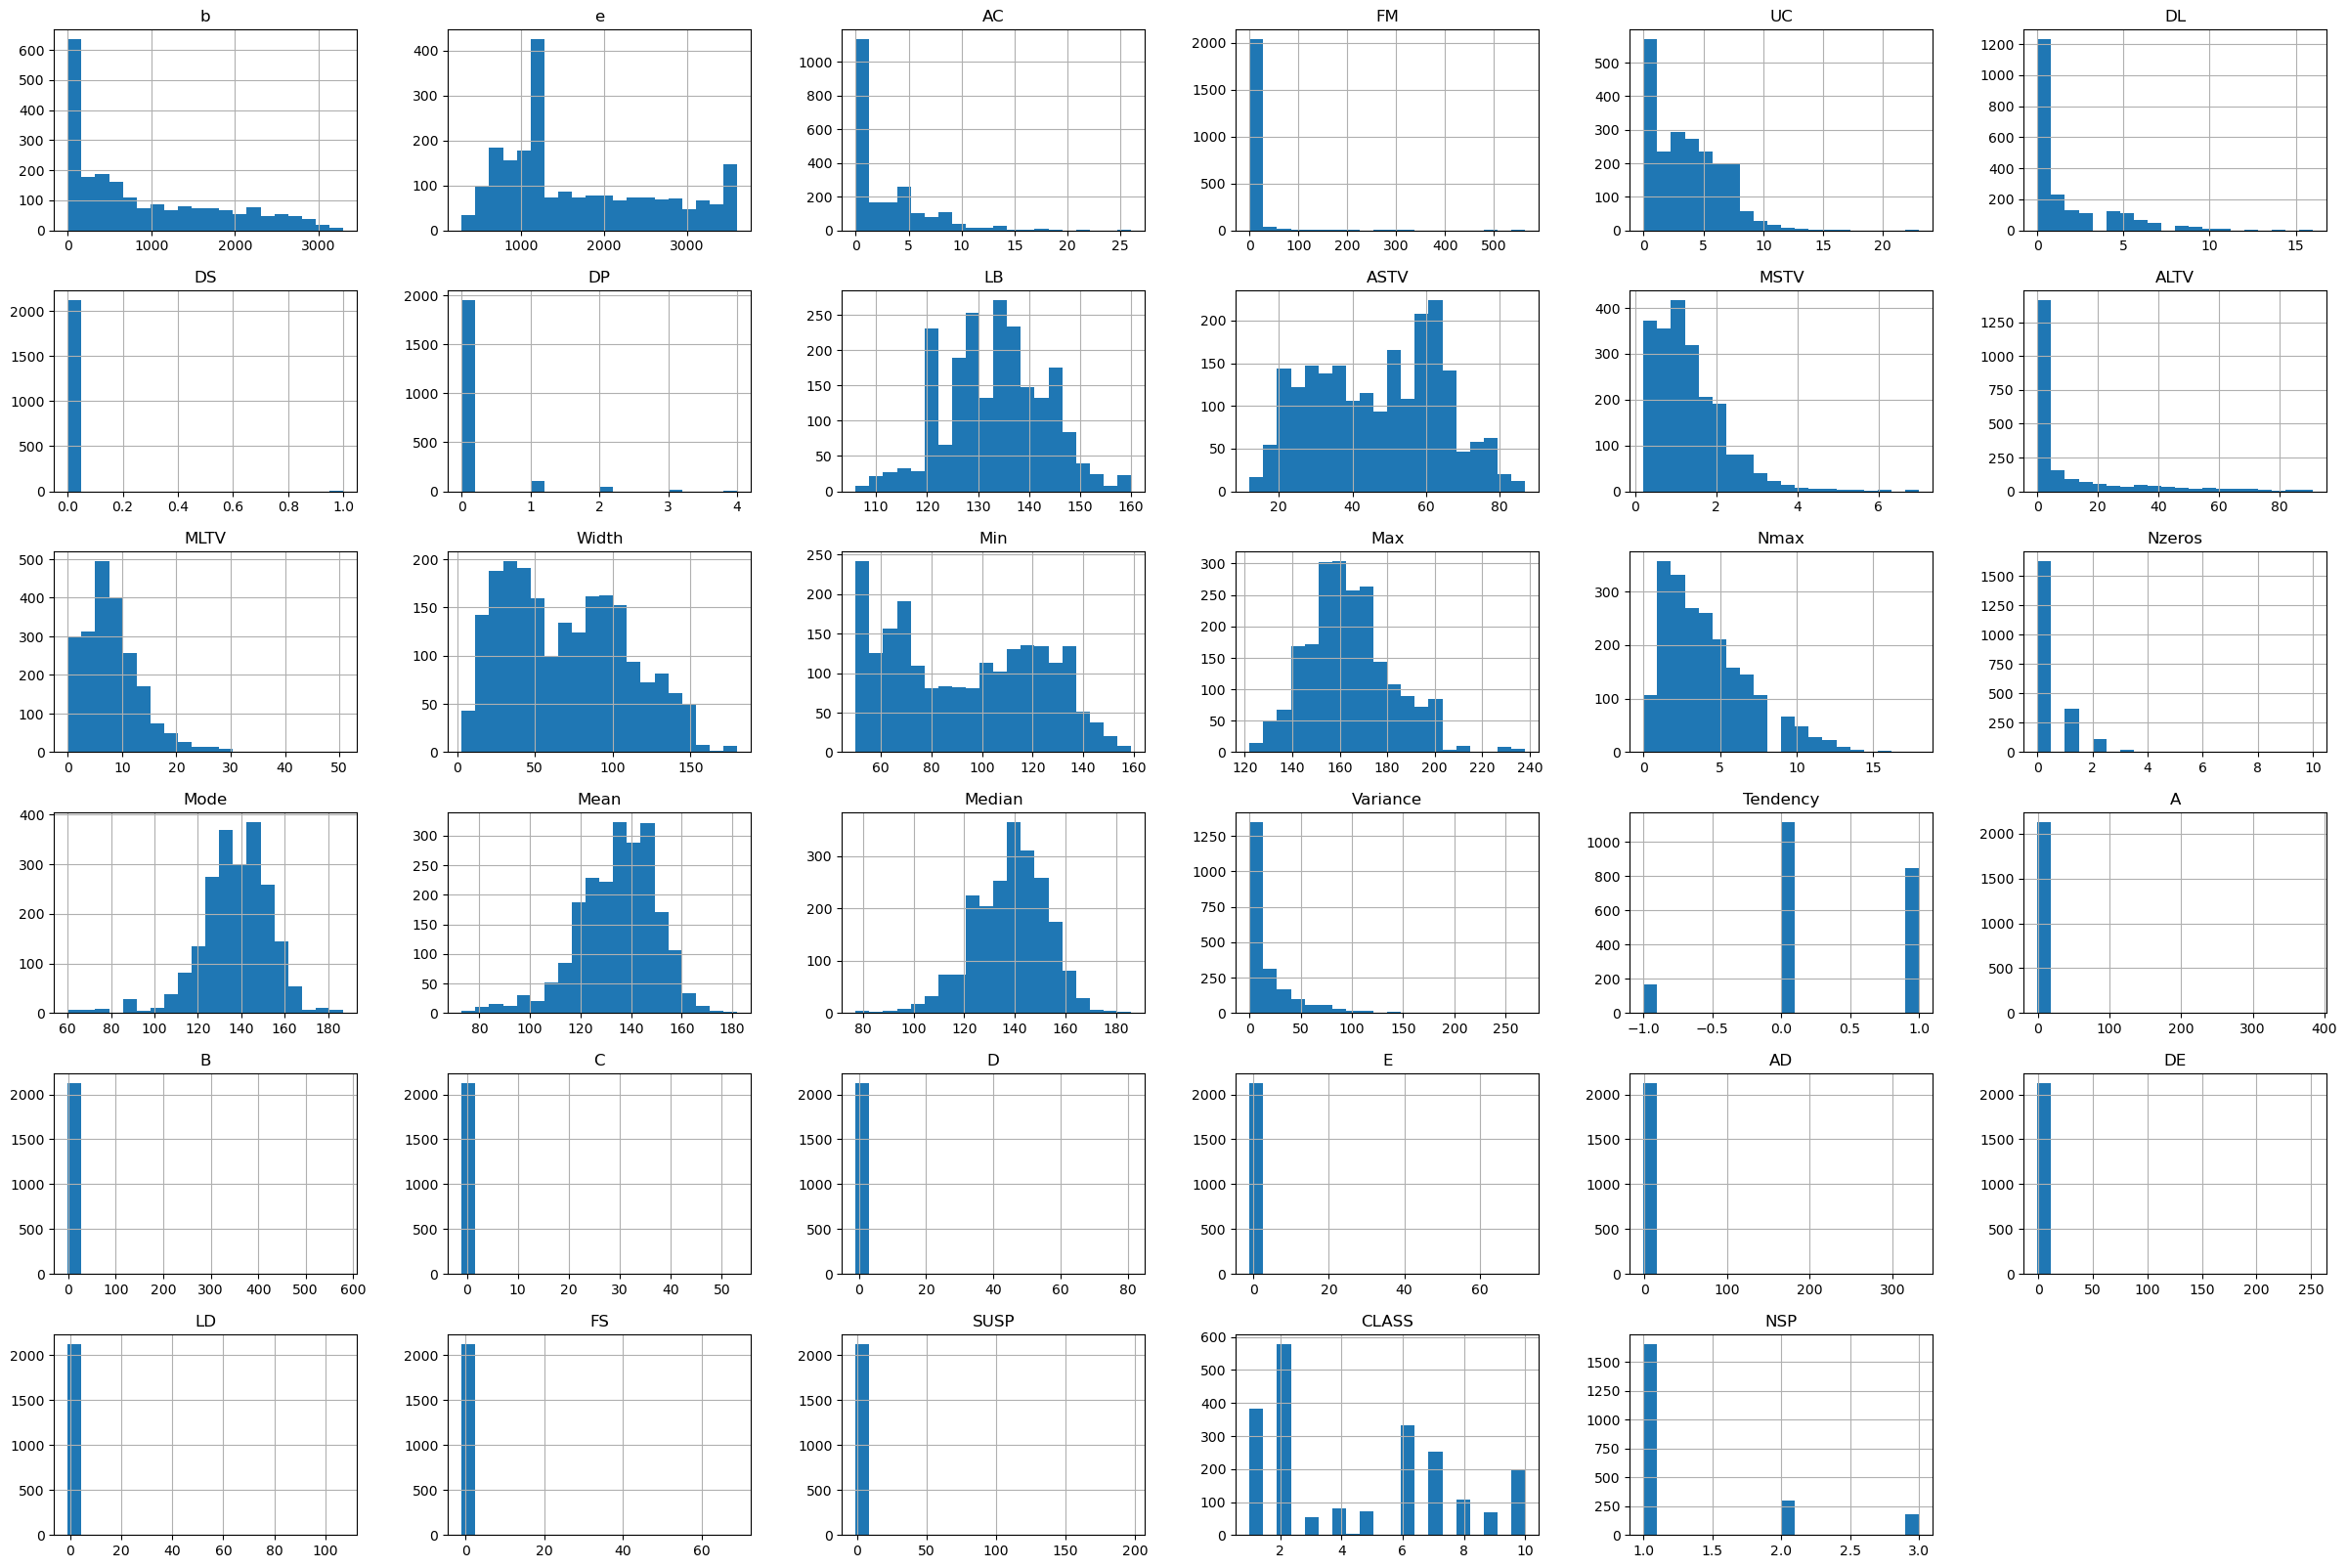

In [22]:
df_cleaned.hist(bins=20, figsize=(30, 20))
plt.show()

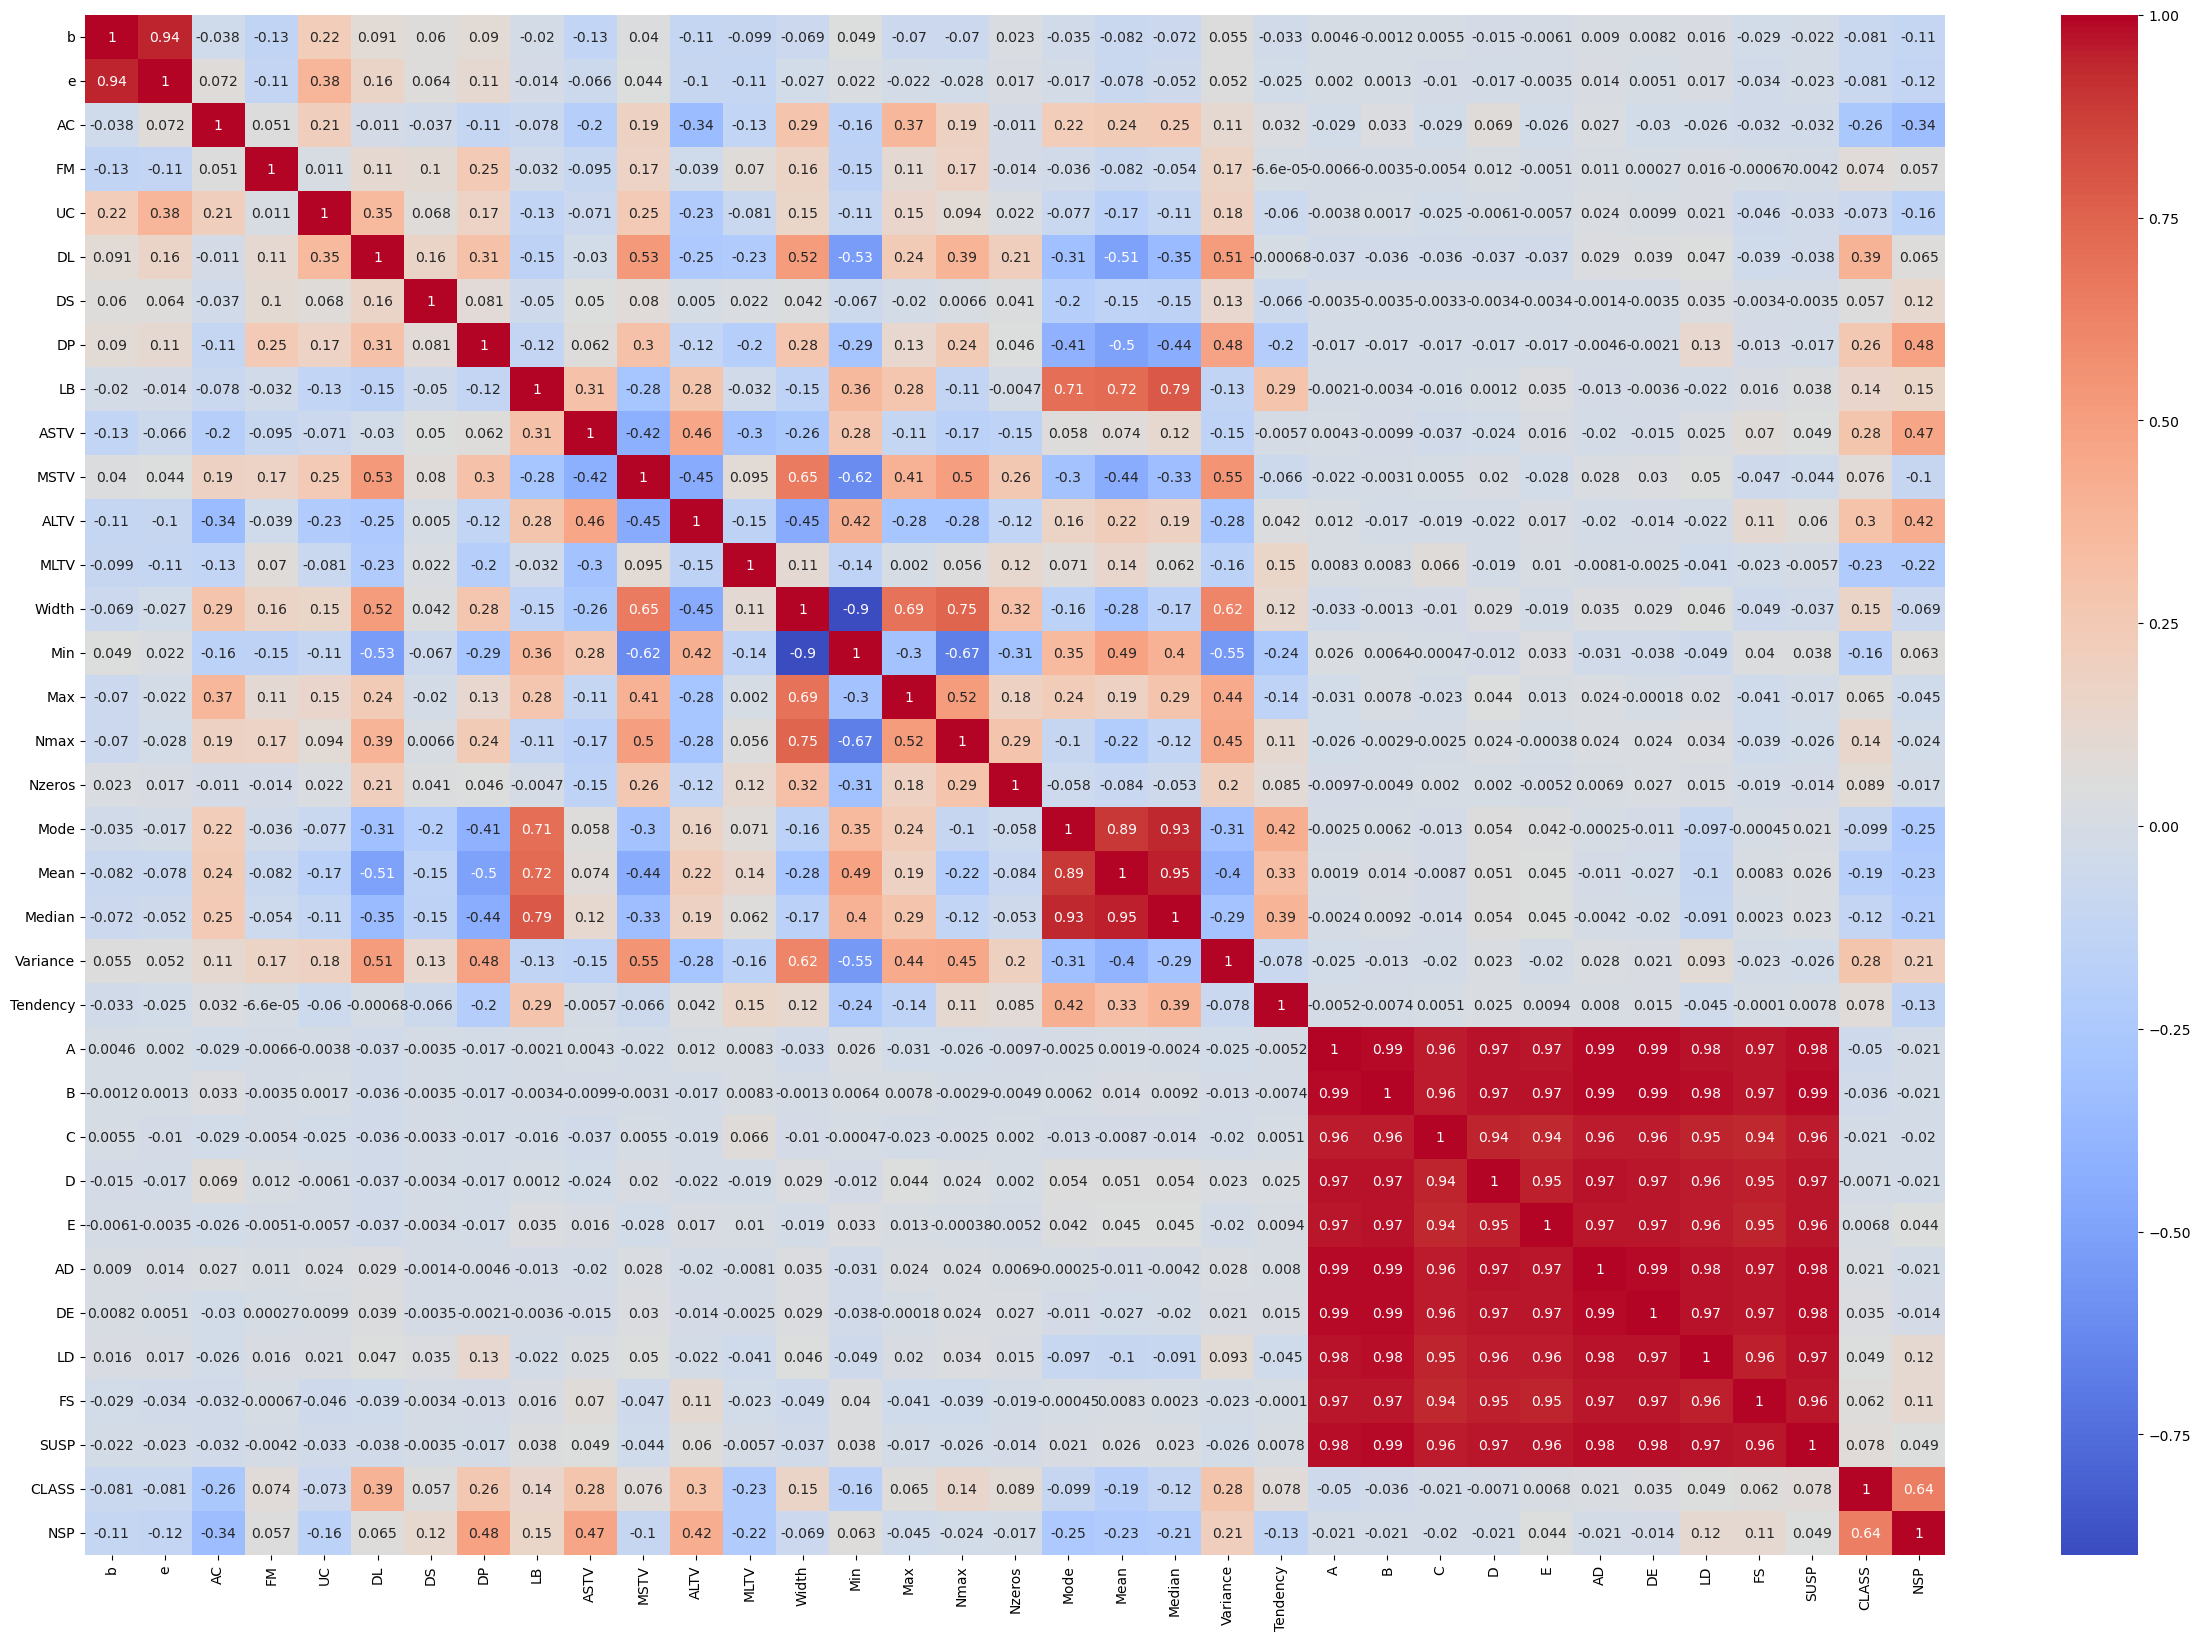

In [25]:
correlation_matrix = df_cleaned.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

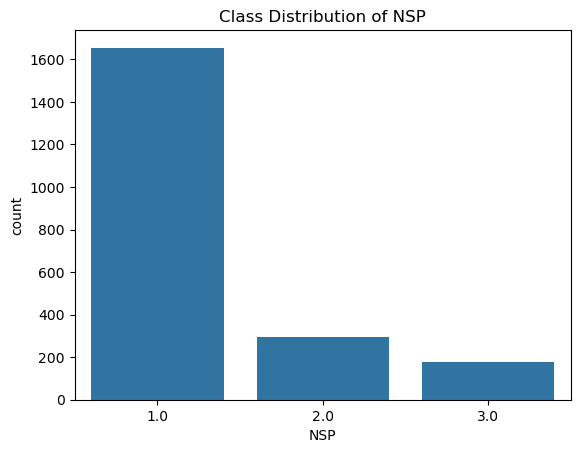

In [27]:
sns.countplot(x='NSP', data=df)
plt.title('Class Distribution of NSP')
plt.show()

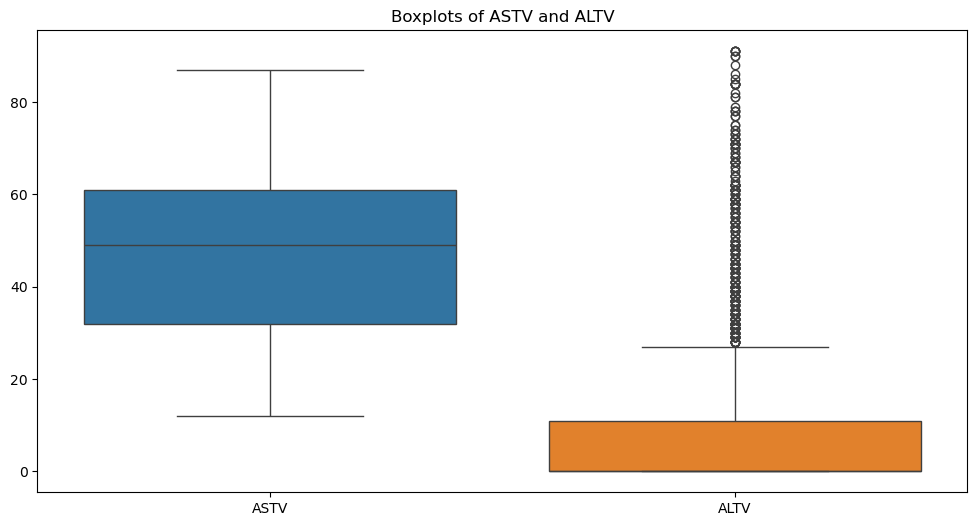

In [29]:
plt.figure(figsize=(12, 6))

# Create side-by-side boxplots for ASTV and ALTV
sns.boxplot(data=df[['ASTV', 'ALTV']])

# Set the title
plt.title('Boxplots of ASTV and ALTV')

# Show the plot
plt.show()

In [35]:
# Save the final cleaned data
df_cleaned.to_csv('cleaned_data.csv', index=False)